## Prepare a prediction model for profit of 50_startups data.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perfoming EDA on dataset

In [55]:
data.shape

(50, 5)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [57]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [58]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [59]:
data[data.duplicated()].shape

(0, 5)

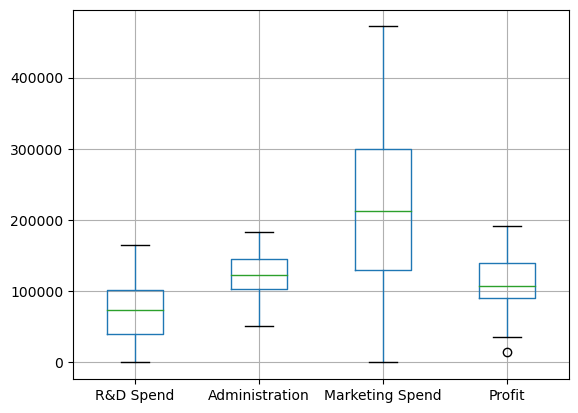

In [60]:
data.boxplot()
plt.show()

In [61]:
data=data.rename({'R&D Spend':'RDS','Marketing Spend':'MS','Administration':'ADMS'},axis=1)
data.head()

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Bulding Model

In [62]:
import statsmodels.formula.api as sfa

In [63]:
model=sfa.ols('Profit~RDS+ADMS+MS',data=data).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        14:51:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression Model

In [65]:
ml_ad=sfa.ols('Profit~ADMS',data=data).fit()

In [66]:
print(ml_ad.tvalues,'\n',ml_ad.pvalues)

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [67]:
ml_ms=sfa.ols('Profit~MS',data=data).fit()

In [68]:
print(ml_ms.tvalues,'\n',ml_ms.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [69]:
ml_adms=sfa.ols('Profit~ADMS+MS',data=data).fit()

In [70]:
print(ml_adms.tvalues,'\n',ml_adms.pvalues)

Intercept    1.142741
ADMS         2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
ADMS         1.729198e-02
MS           9.727245e-11
dtype: float64


In [71]:
cor=data.corr()
cor

,RDS,ADMS,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


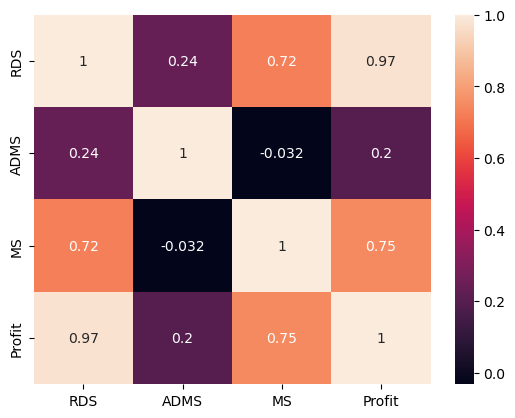

In [72]:
sns.heatmap(cor,annot=True)
plt.show()

In [73]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=sfa.ols("RDS~ADMS+MS",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=sfa.ols("ADMS~RDS+MS",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=sfa.ols("MS~RDS+ADMS",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MS,2.326773


### None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

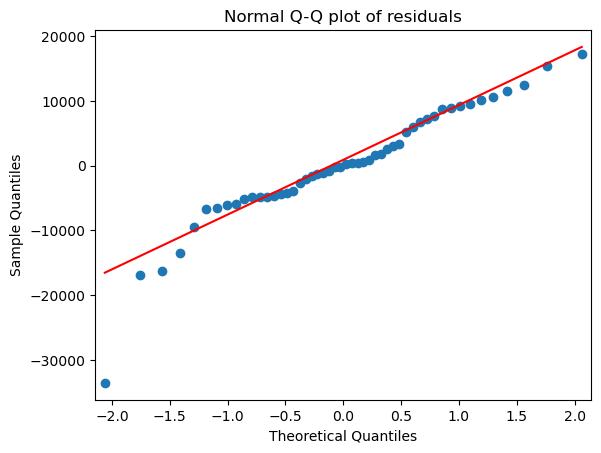

In [74]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [75]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

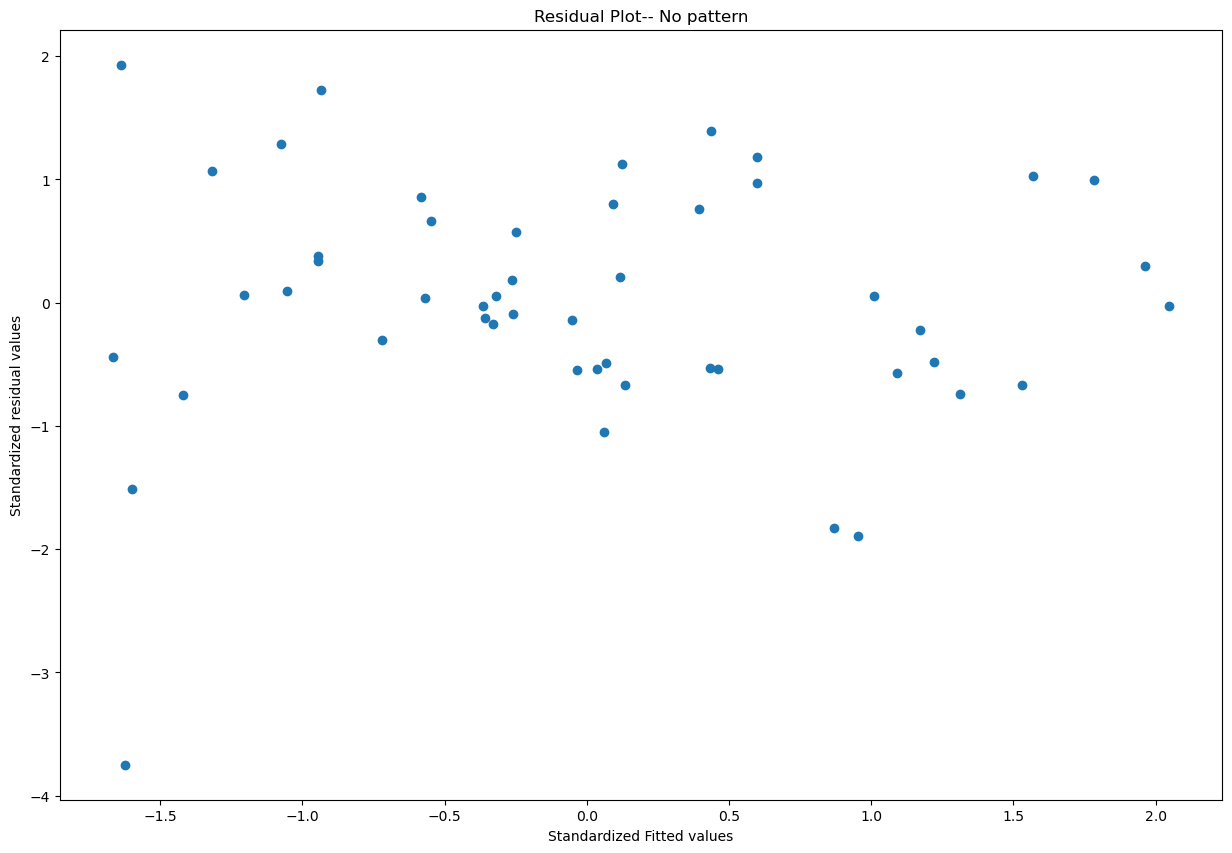

In [76]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot-- No pattern')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


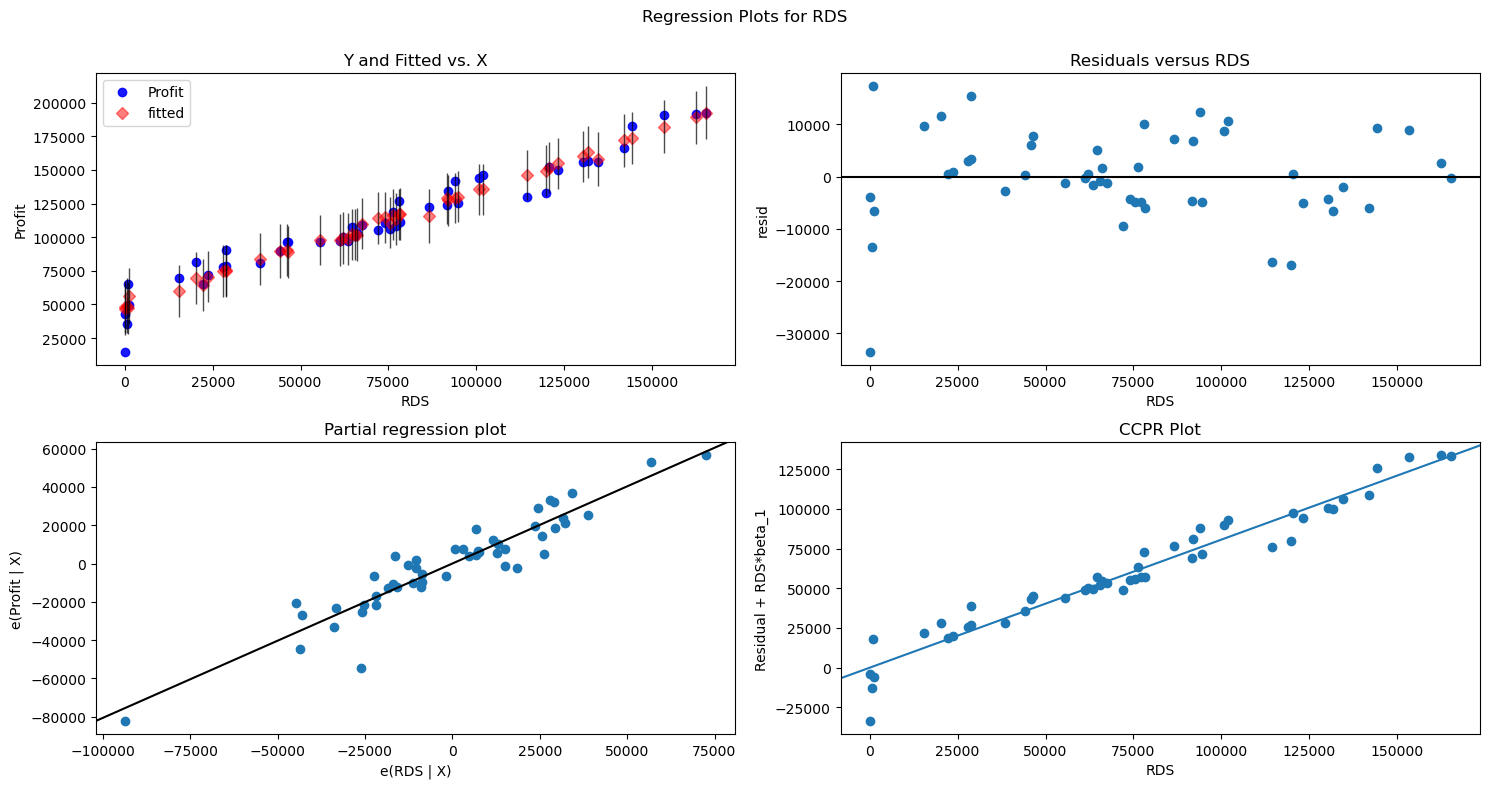

In [77]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


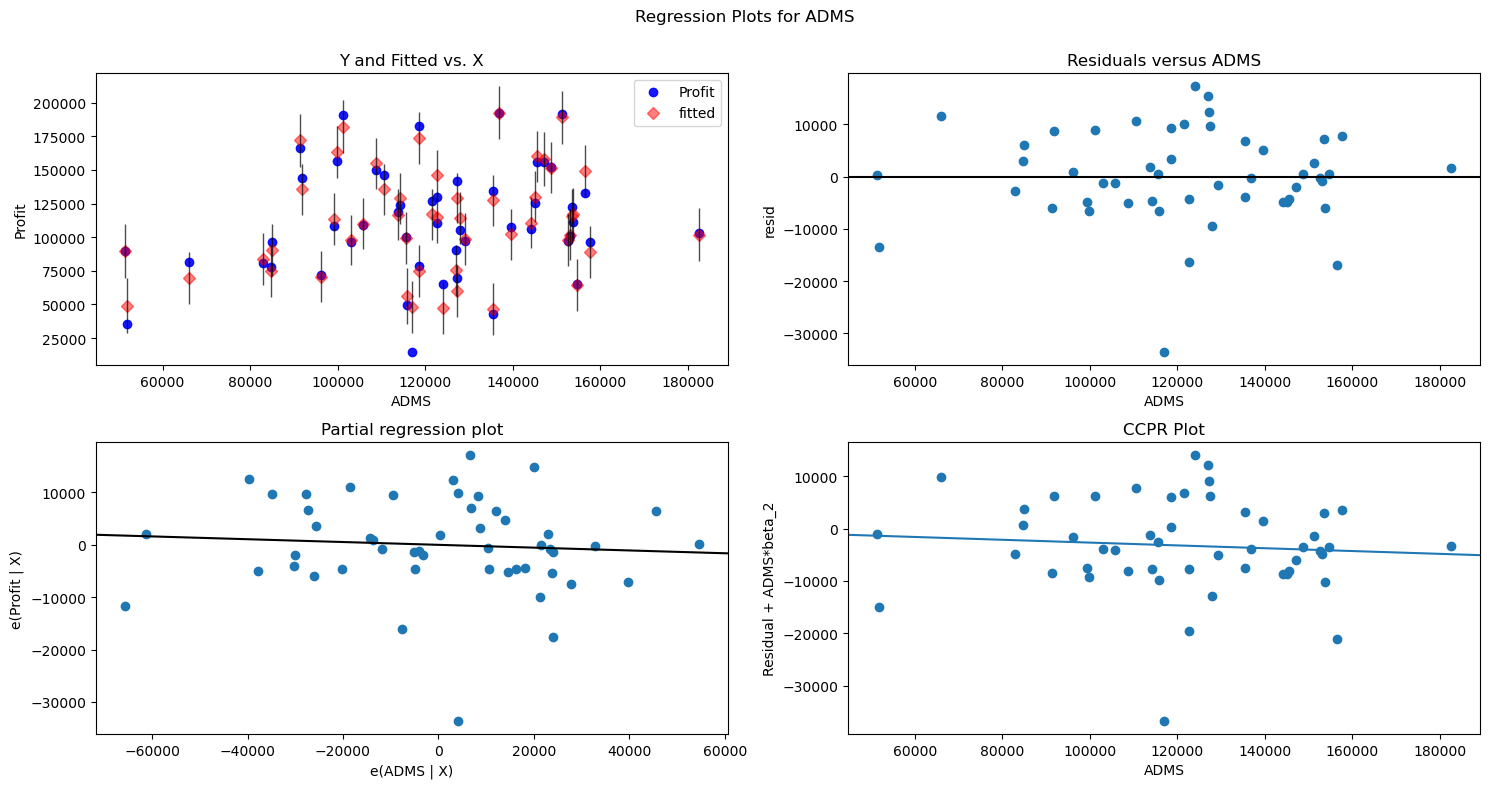

In [78]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


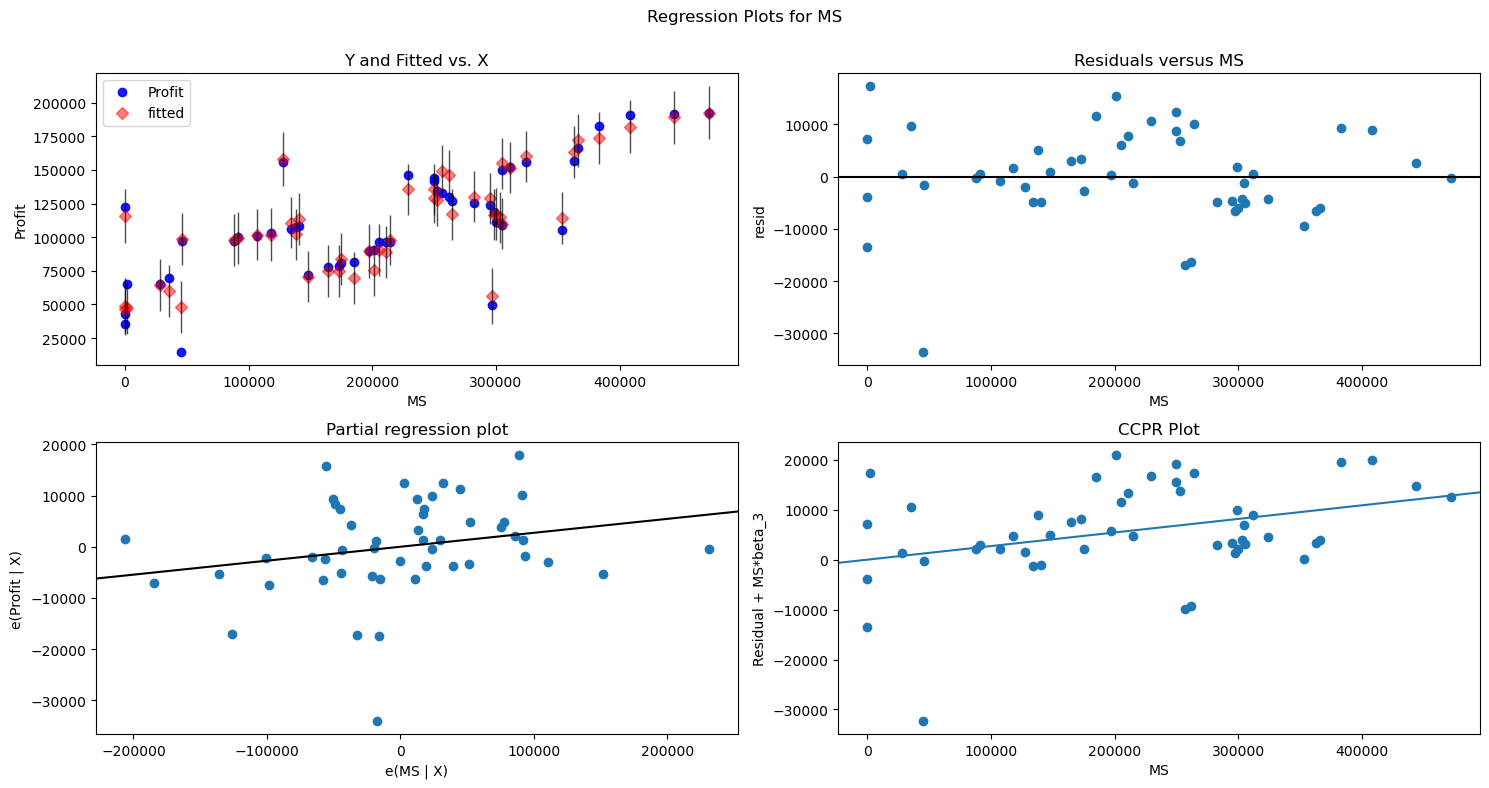

In [79]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

In [80]:
from statsmodels.graphics.regressionplots import influence_plot

In [81]:
model_infulence=model.get_influence()
(c,_)=model_infulence.cooks_distance

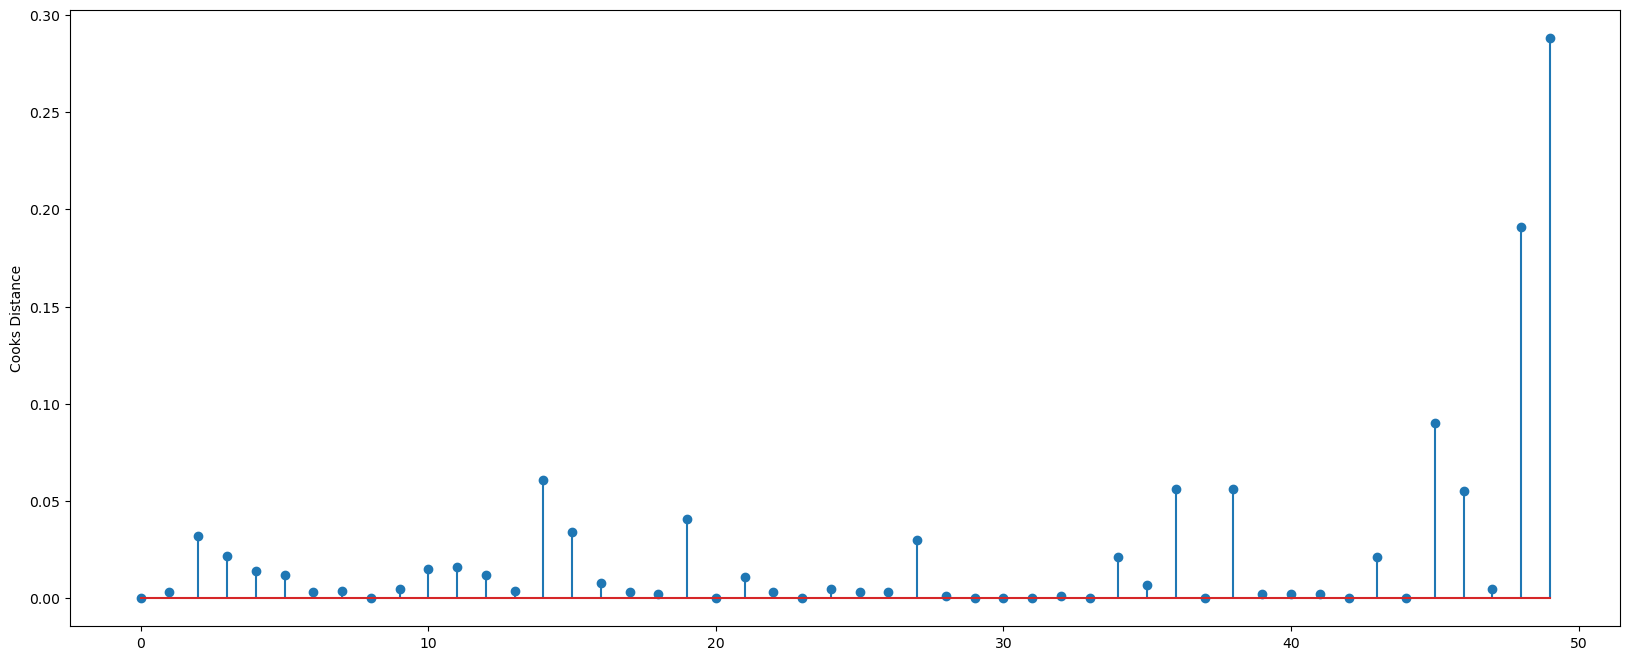

In [82]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.ylabel('Cooks Distance')
plt.show()

In [83]:
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

###  Since the value is <1 , we can stop the diagnostic process and finalize the model

### Improving the Model

In [84]:
data1=data.drop(data.index[49],axis=0).reset_index(drop=True)
data1

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [85]:
final_model=sfa.ols('Profit~RDS+ADMS+MS',data=data1).fit()

In [86]:
print(final_model.rsquared,final_model.aic)

0.9613162435129847 1020.5652974526367


### Predecting New Values

In [87]:
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MS":140000},index=[0])
new_data

,RDS,ADMS,MS
0,70000,90000,140000


In [88]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [89]:
pred_Profit=final_model.predict(data1)

In [90]:
pred_Profit

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

### Table containing R^2 value for each prepared model

In [91]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
